In [1]:
# General important stuff
import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyphotonicsims.control_systems.control_core import *
from pyphotonicsims.control_systems.calculate_laser_noise import *
from pyphotonicsims.laser_dynamics.brillouin_laser import *

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

#### ECL is extended cavity laser with the cavity extended with low loss waveguide
#### Laser metrics caculation: cavity Q, threshold $I_{th}$, efficiency $\eta$, ST linewidth $\nu_{ST}$

In [2]:
sbs = SBSLaser(ord = 4, vST_min = 0.3)

-----------------REPORT------------------
Cavity Q:      96.71 M
P_th:          1.552 mW
min FLW:       0.300 Hz
rho:           5.944
GB:            0.089


#### PI sweep from 0 mA to $10\times I_{th}$, showing thresholding and linewidth narrowing behaviors

c:\users\lkk12\documents\code\pyphotonicsims\pyphotonicsims\laser_dynamics\brillouin_laser.py:118: RuntimeWarning: overflow encountered in double_scalars
  dadt.append((-gamma / 2 - mu * abs(a[ii + 1])**2 +            0          ) * a[ii] + np.sqrt(gamma_ex) * F_pump)
c:\users\lkk12\documents\code\pyphotonicsims\pyphotonicsims\laser_dynamics\brillouin_laser.py:122: RuntimeWarning: overflow encountered in double_scalars
  dadt.append((-gamma / 2 - mu * abs(a[ii + 1])**2 + mu * abs(a[ii - 1])**2) * a[ii] + np.random.rand(1)[0])
c:\users\lkk12\documents\code\pyphotonicsims\pyphotonicsims\laser_dynamics\brillouin_laser.py:122: RuntimeWarning: invalid value encountered in double_scalars
  dadt.append((-gamma / 2 - mu * abs(a[ii + 1])**2 + mu * abs(a[ii - 1])**2) * a[ii] + np.random.rand(1)[0])
c:\users\lkk12\documents\code\pyphotonicsims\pyphotonicsims\laser_dynamics\brillouin_laser.py:120: RuntimeWarning: overflow encountered in double_scalars
  dadt.append((-gamma / 2 -           0       

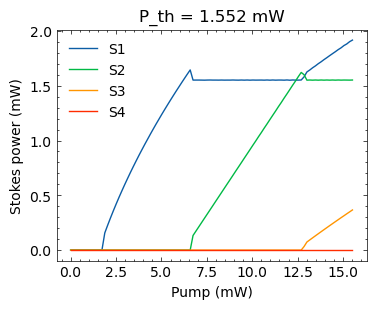

In [3]:
Px = np.linspace(0,10*sbs.P_th,100)
sbs.transient_visulization(Px)

#### Time-domain transient visualization of laser dynamics

In [4]:
Px = np.linspace(0,4*sbs.P_th,4)

#### Laser current modulation frequency response, in terms of carrier density, photon density and output power 

In [5]:
# n1,s1,p1,H,freqx = laser.freqresp_current_mod(laser.I_th*2,freq1 = 1e4,freq2 = 1e11)
# plt.subplot(211)
# plt.loglog(freqx,abs(n1))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('dN/dI')
# plt.subplot(212)
# plt.loglog(freqx,abs(p1))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('dP/dI (mW/mA)')